# Taller 3

In [9]:
from pathlib import Path

import cv2 as cv
import matplotlib.pyplot as plt

import numpy as np

from skimage import exposure
from skimage.util import random_noise

## Ejercicio 1

In [4]:
img_1 = [Path("./img/1-thresholding/OBJECTS.png"),
         Path("./img/1-thresholding/Text.png"),]

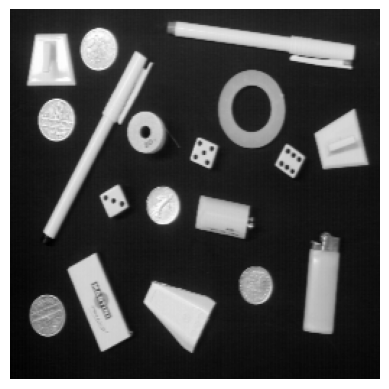

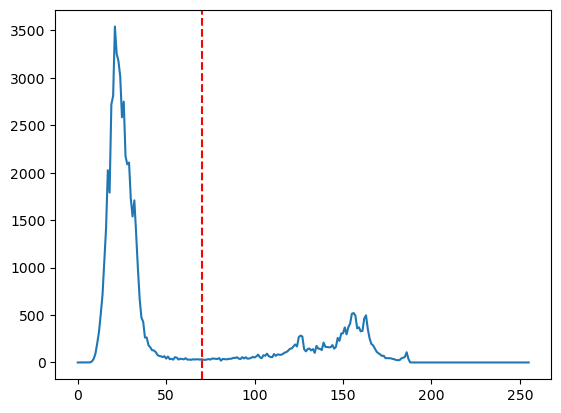

In [7]:
object_img = cv.imread(str(img_1[0]), cv.IMREAD_GRAYSCALE)
plt.imshow(object_img, cmap="gray")
plt.axis("off")
plt.show()

max_x = 70
hist = cv.calcHist([object_img], [0], None, [256], [0, 256])
plt.plot(hist)
plt.axvline(x=max_x, color="r", linestyle="--")
plt.show()

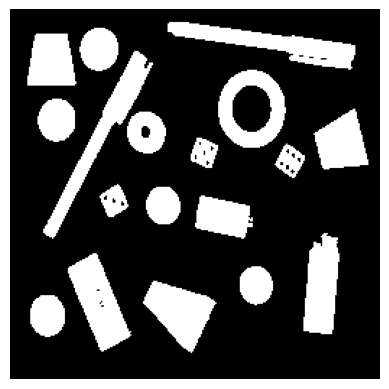

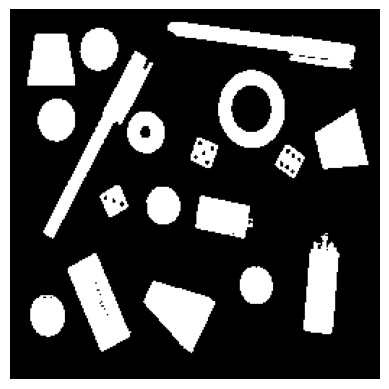

In [23]:
_, object_thresh_global = cv.threshold(object_img, max_x, 255, cv.THRESH_BINARY)
plt.imshow(object_thresh_global, cmap="gray")
plt.axis("off")
plt.show()

_, object_thresh_otsu = cv.threshold(object_img, max_x, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
plt.imshow(object_thresh_otsu, cmap="gray")
plt.axis("off")
plt.show()

0.0 0.8288965411919715
0.0 1.0


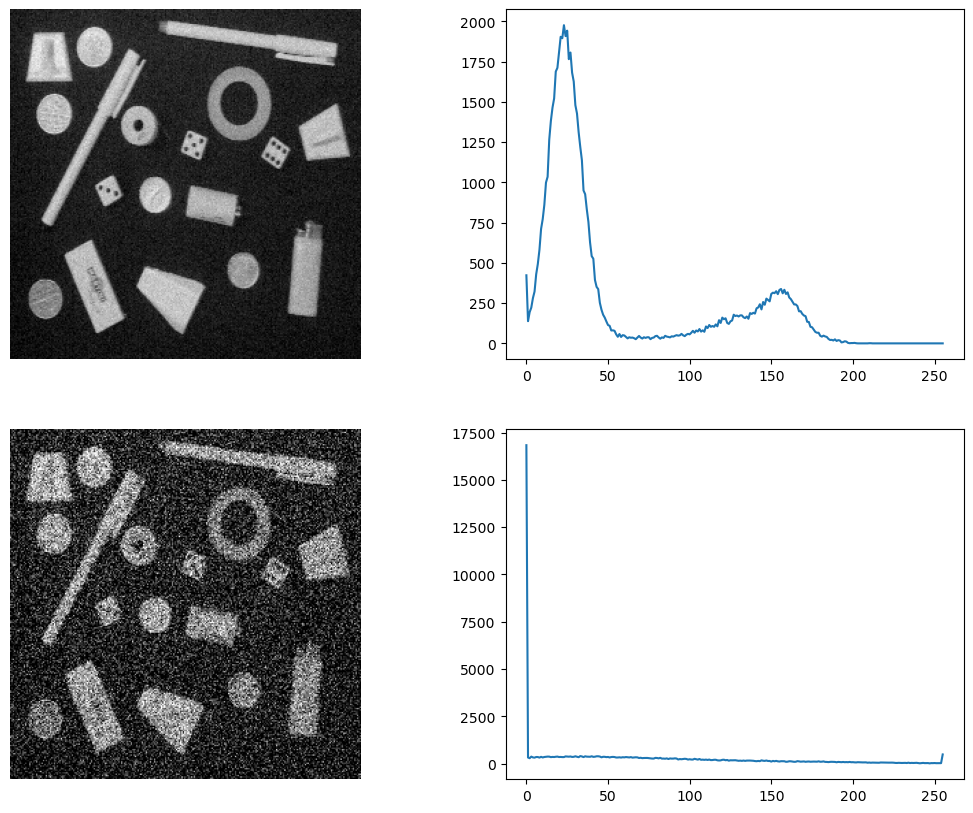

In [27]:
fig_axes = plt.subplots(2, 2, figsize=(13, 10))[1]

object_noise_001 = random_noise(object_img, mode="gaussian", mean=0, var=0.001)
print(object_noise_001.min(), object_noise_001.max())
object_noise_001 = (object_noise_001 * 255).astype(np.uint8)
fig_axes[0, 0].imshow(object_noise_001, cmap="gray")
fig_axes[0, 0].axis("off")
hist = cv.calcHist([object_noise_001], [0], None, [256], [0, 256])
fig_axes[0, 1].plot(hist)


object_noise_05 = random_noise(object_img, mode="gaussian", mean=0, var=0.05)
print(object_noise_05.min(), object_noise_05.max())
object_noise_05 = (object_noise_05 * 255).astype(np.uint8)
fig_axes[1, 0].imshow(object_noise_05, cmap="gray")
fig_axes[1, 0].axis("off")
hist = cv.calcHist([object_noise_05], [0], None, [256], [0, 256])
fig_axes[1, 1].plot(hist)



En el primer caso, cuando usamos una varianza de 0.001, observamos un ensanchamiento en los dos modos de la imágen. La imágen, que antes tenía una definición bastante buena, y se veía suave, ahora se ve granulada. El ruido ha generado un ligero desplazamiento en los grises que toman los pixeles.

En el segundo caso, en el que la varianza incrementa bastante, las fluctuaciones en los valores de grises de los píxeles es tan grande que un valor de gris $x$ casi seguramente pasa a $0$ o a $255$, casi sin tener en cuenta su valor inicial. La imágen ahora parece binaria y hay MUCHO ruído.

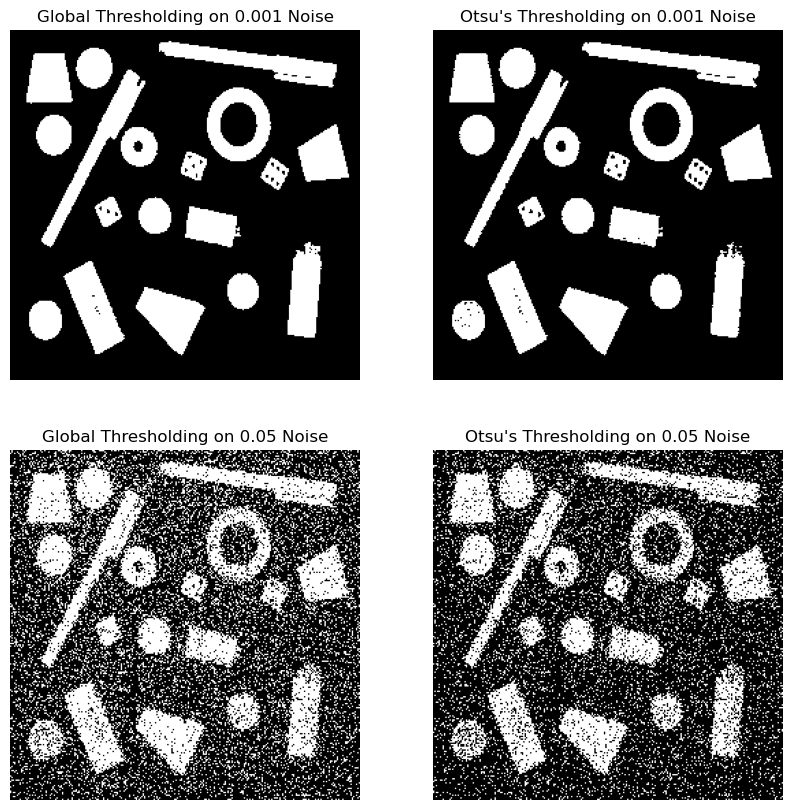

In [25]:
_, object_thresh_001 = cv.threshold(object_noise_001, max_x, 255, cv.THRESH_BINARY)
_, object_thresh_otsu_001 = cv.threshold(object_noise_001, max_x, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

_, object_thresh_05 = cv.threshold(object_noise_05, max_x, 255, cv.THRESH_BINARY)
_, object_thresh_otsu_05 = cv.threshold(object_noise_05, max_x, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

fig_axes = plt.subplots(2, 2, figsize=(10, 10))[1]
fig_axes[0, 0].imshow(object_thresh_001, cmap="gray")
fig_axes[0, 0].axis("off")
fig_axes[0, 0].set_title("Global Thresholding on 0.001 Noise")
fig_axes[0, 1].imshow(object_thresh_otsu_001, cmap="gray")
fig_axes[0, 1].axis("off")
fig_axes[0, 1].set_title("Otsu's Thresholding on 0.001 Noise")
fig_axes[1, 0].imshow(object_thresh_05, cmap="gray")
fig_axes[1, 0].axis("off")
fig_axes[1, 0].set_title("Global Thresholding on 0.05 Noise")
fig_axes[1, 1].imshow(object_thresh_otsu_05, cmap="gray")
fig_axes[1, 1].axis("off")
fig_axes[1, 1].set_title("Otsu's Thresholding on 0.05 Noise")
plt.show()


En el caso de ruido con varianza $0.001$, notamos que no ocurrieron cambios notables en la umbralización (con respecto a la realizada anteriormente). Esto se debe a que, si bien los dos modos en los histogramas se ensancharon, todavía son fácilmente diferenciables. 

Por otro lado, cuando intentamos umbralizar la imágen con ruido con varianza $0.05$, vemos el ruído todavía presente en la imágen. Esto se debe a lo explicado anteriormente. pixeles que antes eran del modo negro ahora están más en el espectro de los grises claros, y viceversa.

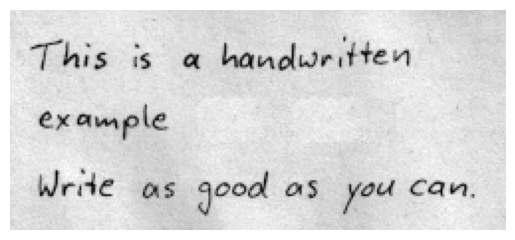

In [28]:
text_img = cv.imread(str(img_1[1]), cv.IMREAD_GRAYSCALE)
plt.imshow(text_img, cmap="gray")
plt.axis("off")
plt.show()